Let's we interested in Ethereum, and Dogecoin and Bitcoin based on portfolio optimization and we want to predict the near future of the prices of these cryptocurrencies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.gofplots import qqplot

## Import data

In [2]:
crypto = pd.read_csv("cryptocurrencies_historical_data")

crypto = crypto.set_index('Date')

crypto.index = pd.to_datetime(crypto.index)

crypto.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2020-07-03 to 2023-07-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BTCUSDT   1095 non-null   float64
 1   ETHUSDT   1095 non-null   float64
 2   XRPUSDT   1095 non-null   float64
 3   DOGEUSDT  1095 non-null   float64
 4   LTCUSDT   1095 non-null   float64
 5   ADAUSDT   1095 non-null   float64
dtypes: float64(6)
memory usage: 59.9 KB


## Data Exploration Cryptocurrencies

In [3]:
crypto = crypto[["BTCUSDT", "ETHUSDT", "DOGEUSDT"]]

crypto.head(5)

,BTCUSDT,ETHUSDT,DOGEUSDT
Date,,,
2020-07-03,9058.26,224.87,0.002314
2020-07-04,9135.46,229.17,0.002301
2020-07-05,9069.41,227.56,0.002303
2020-07-06,9344.20,241.60,0.002619
2020-07-07,9257.39,239.39,0.003136


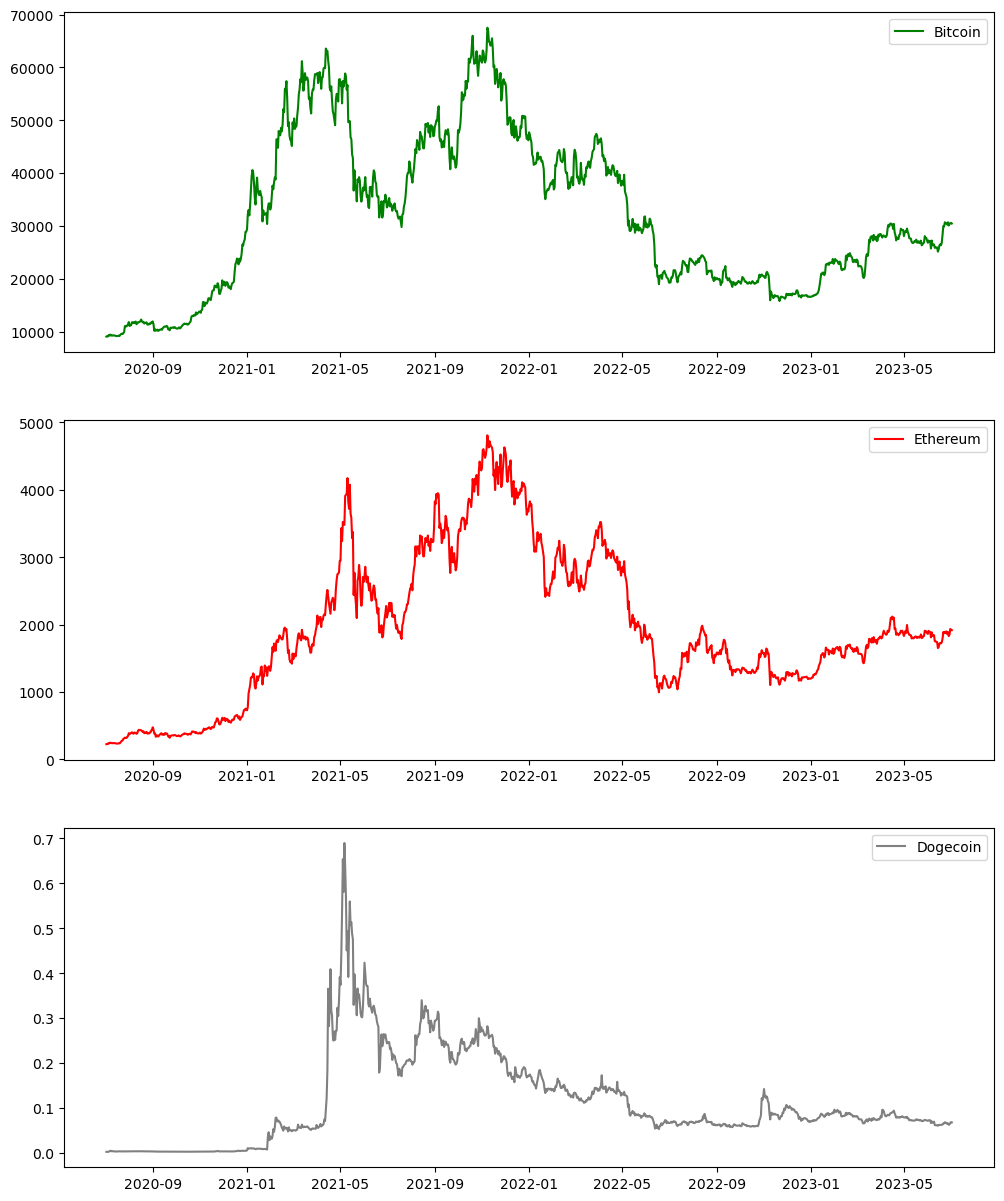

In [4]:
# Visualize prices

fig, axs = plt.subplots(3, 1, figsize = (12, 15))

axs[0].plot(crypto["BTCUSDT"], label = "Bitcoin", color = "green")
axs[1].plot(crypto["ETHUSDT"], label = "Ethereum", color = "red")
axs[2].plot(crypto["DOGEUSDT"], label = "Dogecoin", color = "grey")

axs_ = [0, 1, 2]

for ax in axs_:
    axs[ax].legend()

In [5]:
crypto.describe().T

,count,mean,std,min,25%,50%,75%,max
BTCUSDT,1095.0,31748.967342,14769.104040,9058.260000,19662.475000,29091.88000,42949.1900,67525.83000
ETHUSDT,1095.0,1946.458932,1087.852568,224.870000,1252.235000,1792.22000,2700.2850,4807.98000
DOGEUSDT,1095.0,0.114271,0.104135,0.002301,0.058655,0.07919,0.1607,0.68982


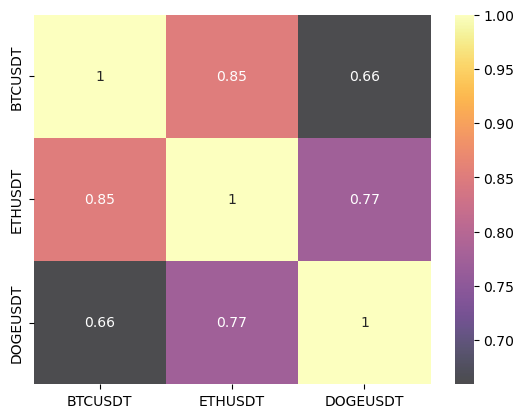

In [6]:
# Let's do correlation analysis again.

correlation = crypto.corr()

sns.heatmap(correlation, annot = True, cmap = 'inferno', alpha = 0.7)

plt.show()

### Decomposition analysis

In [7]:
def decomposition(data, method = str):
    
    decomposition = sm.tsa.seasonal_decompose(data, model = method)
    
    trend = decomposition.trend
    
    seasonality = decomposition.seasonal
    
    resid = decomposition.resid
    
    fig, axs = plt.subplots(4, 1, figsize = (10, 16))
    
    axs[0].plot(data, label = "Original Data", color = "grey")
    axs[1].plot(trend, label = "Trend", color = "grey")
    axs[2].plot(seasonality, label = "Seasonal", color = "grey")
    axs[3].plot(resid, label = "Residuals", color = "grey")
    
    axs_ = [0, 1, 2, 3]
    
    for ax in axs_:
        axs[ax].legend()
    


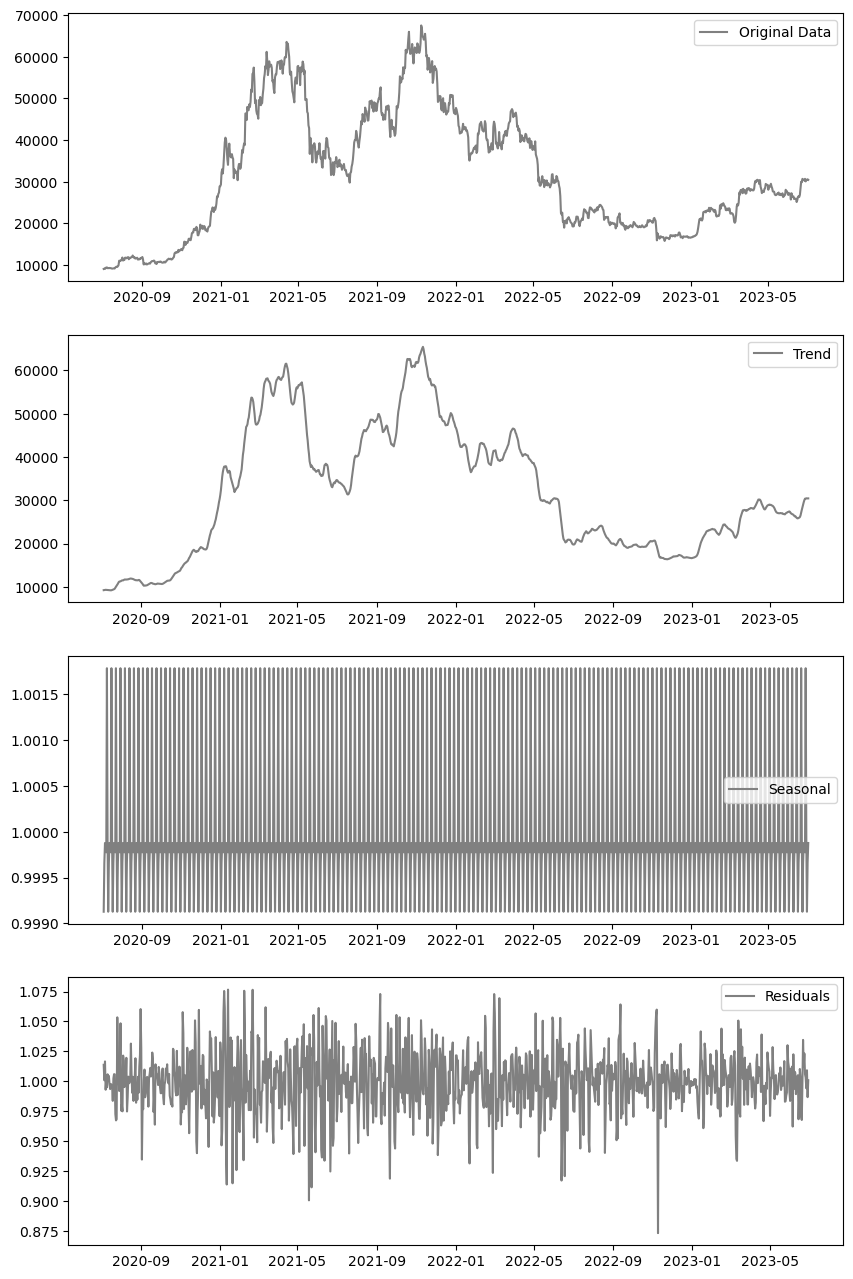

In [8]:
decomposition(crypto["BTCUSDT"], method = "multiplicative")

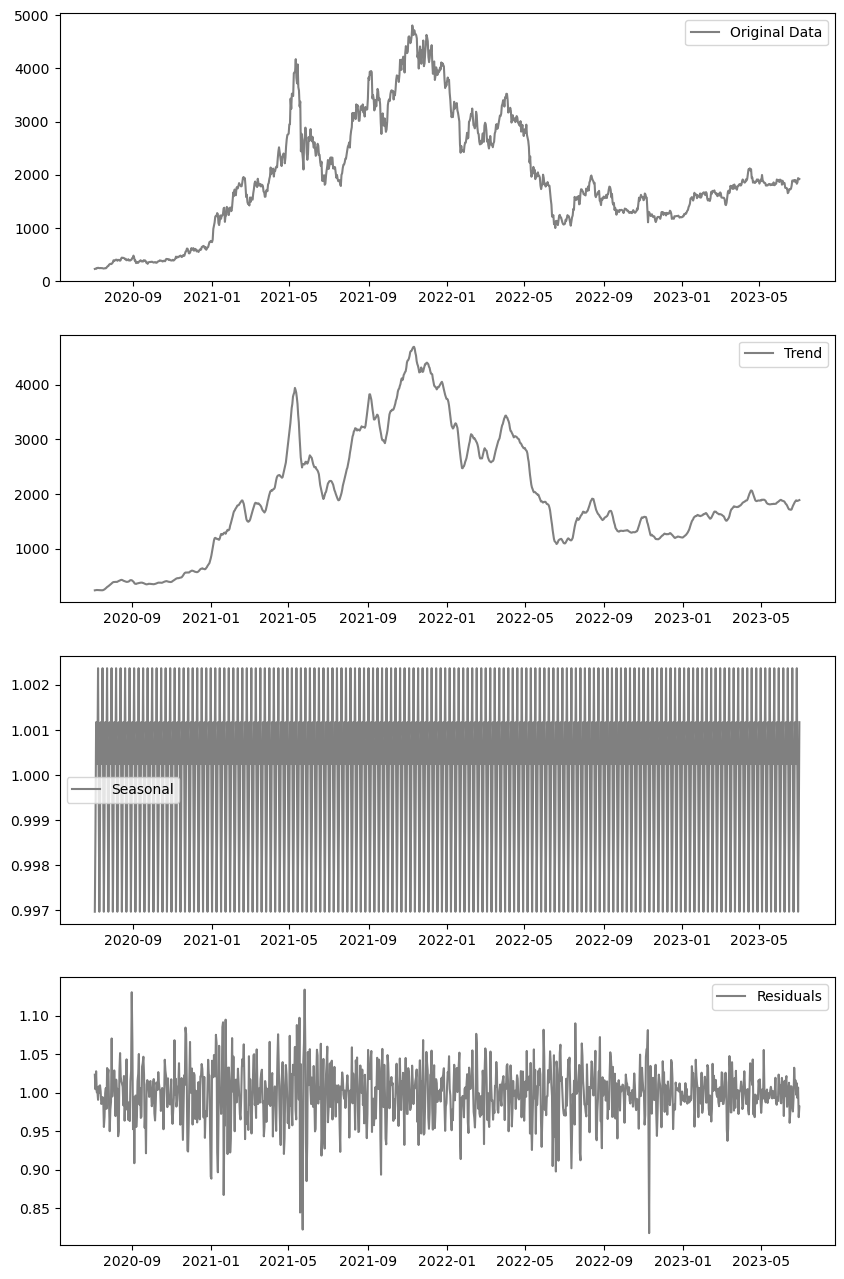

In [9]:
decomposition(crypto["ETHUSDT"], method = "multiplicative")

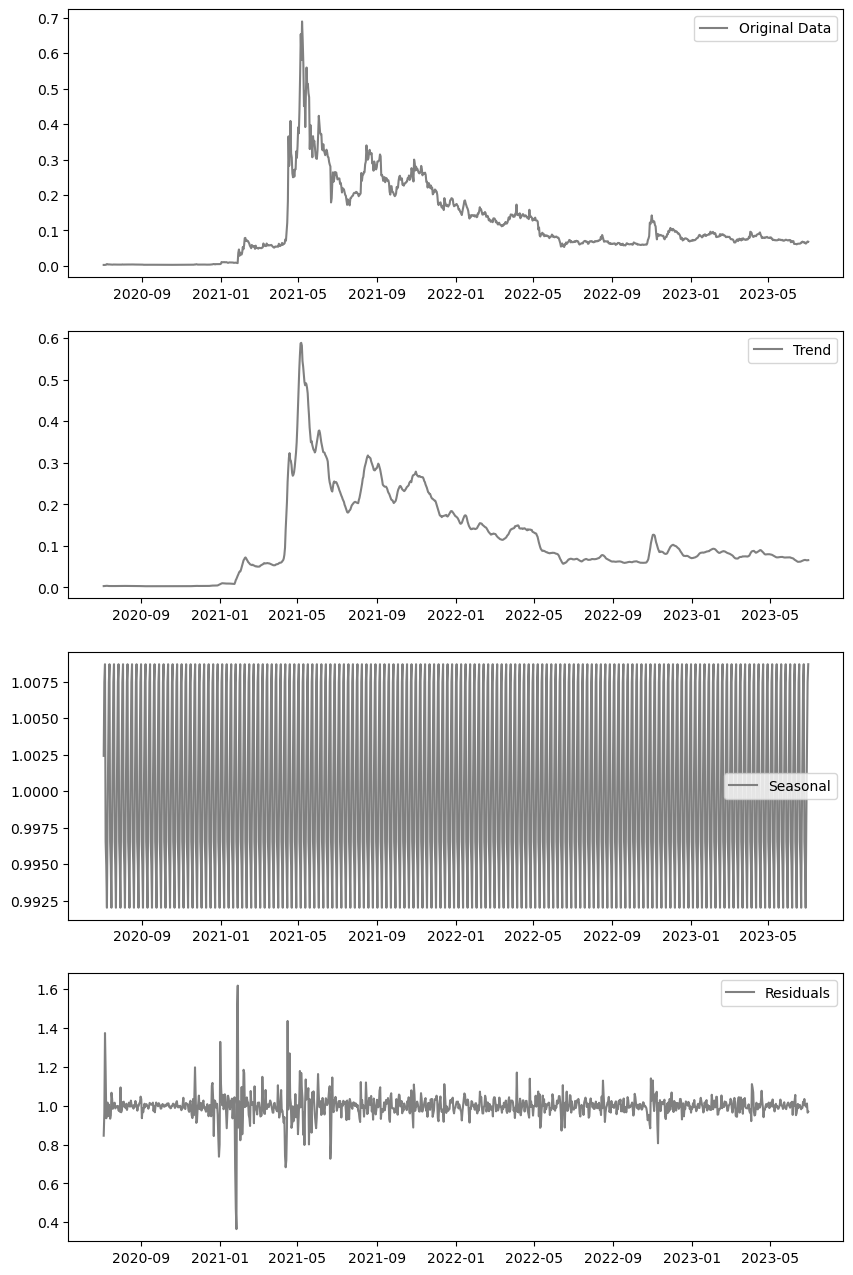

In [10]:
decomposition(crypto["DOGEUSDT"], method = "multiplicative")

### Stationary Check:

Simply, a stationary time series is one whose mean, variance, and autocovariance remain constant over time.

Stationary is an important assumption in many time series models and analyses because it simplifies the mathematical calculations and allows for the use of various statistical tools and techniques.

In practice, it is often tested by using stationary tests such as the Augmented Dickey Fuller(ADF) test or the KPSS(Kwiatkowski-Phillips-Schmidt-Shin) test to ensure that the data meet the necessary assumptions. 

If a time series is found to be non stationary, it may require transformation or/and differencing to make it stationary before applying certain models or analyses.

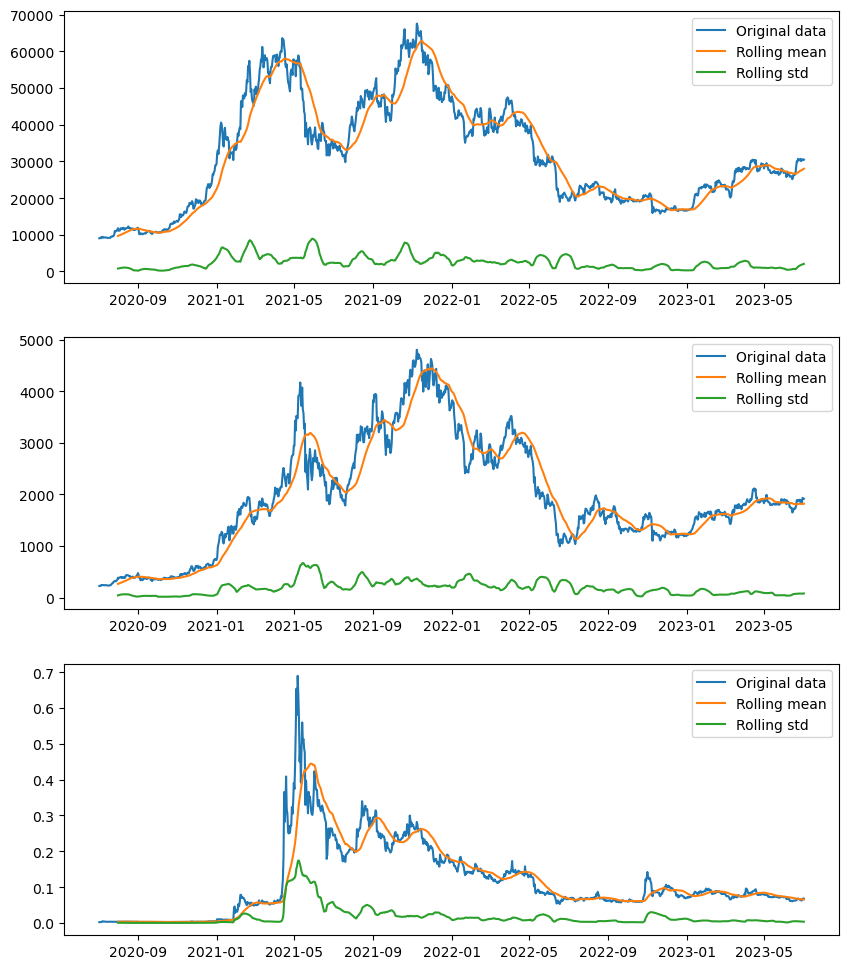

In [11]:
rolling_mean = crypto.rolling(window = 30).mean()

rolling_std = crypto.rolling(window = 30).std()

fig, axs = plt.subplots(3, 1, figsize = (10, 12))


axs[0].plot(crypto["BTCUSDT"], label = "Original data")
axs[0].plot(rolling_mean["BTCUSDT"], label = "Rolling mean")
axs[0].plot(rolling_std["BTCUSDT"], label = "Rolling std")

axs[1].plot(crypto["ETHUSDT"], label = "Original data")
axs[1].plot(rolling_mean["ETHUSDT"], label = "Rolling mean")
axs[1].plot(rolling_std["ETHUSDT"], label = "Rolling std")

axs[2].plot(crypto["DOGEUSDT"], label = "Original data")
axs[2].plot(rolling_mean["DOGEUSDT"], label = "Rolling mean")
axs[2].plot(rolling_std["DOGEUSDT"], label = "Rolling std")

axs_ = [0, 1, 2]

for ax in axs_:
    axs[ax].legend()

<b>ADF test:</b>
* <b>Null Hypothesis :</b> The null hypothesis assumes the presence of a unit root, indicating non-stationary in the time series.
* <b>Alternative Hypothesis :</b> The alternative hypothesis assumes the absence(yokluk) of a unit root, indicating stationary in time series.

If the p-value is less than a chosen significant level(e.g., 0.05 ) we reject the null hypothesis and conclude that the series is stationary. A smaller p-value provides stronger evidence against the null hypothesis.

In [12]:
# Adfuller test to check stationary.

coins = list(crypto.columns)

for coin in coins:
    
    result = adfuller(crypto[coin])
    print(coin)
    print("Test Statistic : {}".format(result[0]))
    print("p-value : {}".format(result[1]))
    print("Number of lags used : {}".format(result[2]))
    print("Number of Observations : {}".format(result[3]))
    print("Critical Values : {}".format(result[4:]))
    print("\n------------\n")

BTCUSDT
Test Statistic : -1.8591918069753555
p-value : 0.3514952126190173
Number of lags used : 0
Number of Observations : 1094
Critical Values : ({'1%': -3.436341508283391, '5%': -2.864185524365606, '10%': -2.5681785627437677}, 18432.616555508426)

------------

ETHUSDT
Test Statistic : -2.006739067914047
p-value : 0.2836260926150609
Number of lags used : 6
Number of Observations : 1088
Critical Values : ({'1%': -3.4363746281360426, '5%': -2.864200133611212, '10%': -2.568186343567528}, 13002.89935638694)

------------

DOGEUSDT
Test Statistic : -2.680716050674768
p-value : 0.07743509173538396
Number of lags used : 19
Number of Observations : 1075
Critical Values : ({'1%': -3.4364476591811033, '5%': -2.864232347211692, '10%': -2.5682035004867494}, -5983.668286454763)

------------



#### Interpretation :

* <b>BTCUSDT(Bitcoin)</b>, p-value is greater than the significance level and the test statistic not being more negative than the critical values. we cannot reject the null hypothesis of non-stationarity for the BTCUSDT time series. It suggests that the BTCUSDT series is likely non-stationary.

* <b>ETHUSDT(Ethereum)</b>, p-value is greater than the significance level, and the test statistic is less negative than the critical values, suggesting weak evidence against the null hypothesis of non-stationarity.

* <b>DOGEUSDT(Dogecoin)</b>,  The p-value is above the significance level, but the test statistic is more negative than the critical values, indicating somewhat stronger evidence against non-stationarity.


Based on the ADF test results, the BTCUSDT, ETHUSDT, and DOGEUSDT time series are likely non-stationary.

## Data Preparation

In [13]:
# First order differencing to remove trends and achieve stationary 

log_transform = np.log(crypto)

differenced_crypto = log_transform.diff(1).dropna()

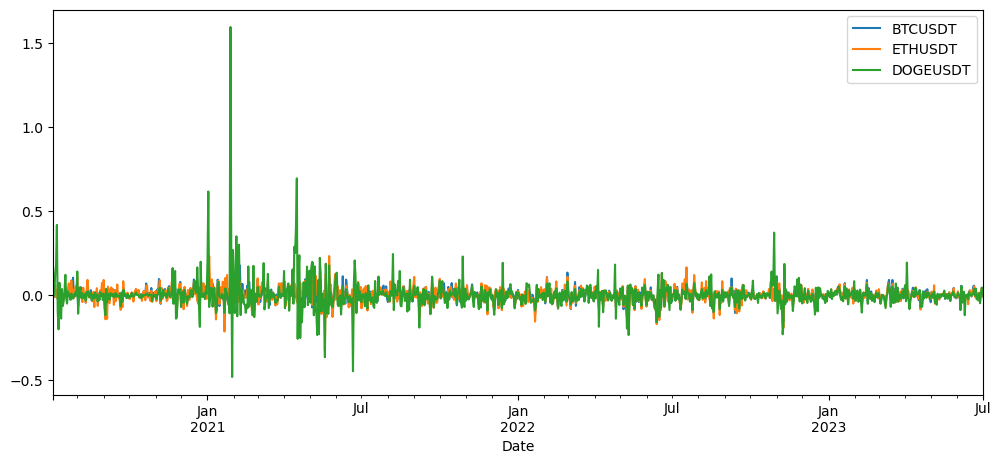

In [14]:
# Transformed Data.

differenced_crypto.plot(figsize = (12, 5))

plt.show()

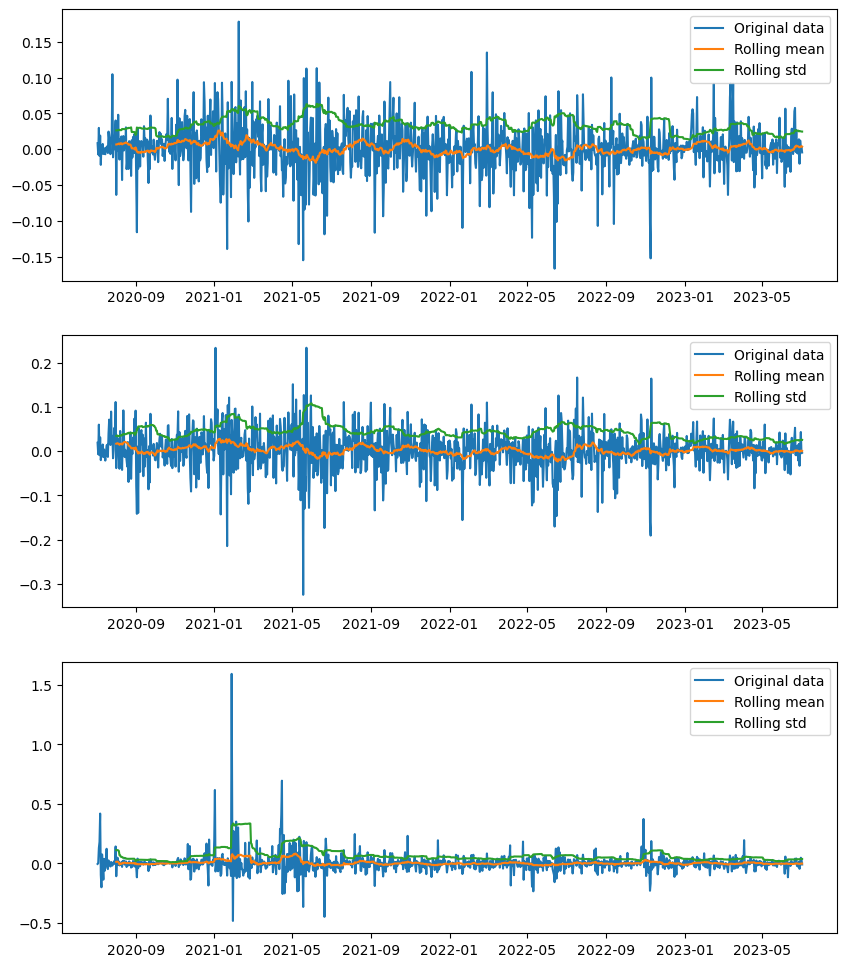

In [15]:
rolling_mean = differenced_crypto.rolling(window = 30).mean()

rolling_std = differenced_crypto.rolling(window = 30).std()

fig, axs = plt.subplots(3, 1, figsize = (10, 12))


axs[0].plot(differenced_crypto["BTCUSDT"], label = "Original data")
axs[0].plot(rolling_mean["BTCUSDT"], label = "Rolling mean")
axs[0].plot(rolling_std["BTCUSDT"], label = "Rolling std")

axs[1].plot(differenced_crypto["ETHUSDT"], label = "Original data")
axs[1].plot(rolling_mean["ETHUSDT"], label = "Rolling mean")
axs[1].plot(rolling_std["ETHUSDT"], label = "Rolling std")

axs[2].plot(differenced_crypto["DOGEUSDT"], label = "Original data")
axs[2].plot(rolling_mean["DOGEUSDT"], label = "Rolling mean")
axs[2].plot(rolling_std["DOGEUSDT"], label = "Rolling std")

axs_ = [0, 1, 2]

for ax in axs_:
    axs[ax].legend()

In [16]:
# Adfuller test to check stationary again.

coins = list(differenced_crypto.columns)

for coin in coins:
    
    result = adfuller(differenced_crypto[coin])
    print(coin)
    print("Test Statistic : {}".format(result[0]))
    print("p-value : {}".format(result[1]))
    print("Number of lags used : {}".format(result[2]))
    print("Number of Observations : {}".format(result[3]))
    print("Critical Values : {}".format(result[4:]))
    print("\n------------\n")

BTCUSDT
Test Statistic : -33.93860354619923
p-value : 0.0
Number of lags used : 0
Number of Observations : 1093
Critical Values : ({'1%': -3.4363470029475525, '5%': -2.864187948086107, '10%': -2.568179853605536}, -4116.432283344663)

------------

ETHUSDT
Test Statistic : -9.725625222152493
p-value : 9.291293269328128e-17
Number of lags used : 9
Number of Observations : 1084
Critical Values : ({'1%': -3.436396912213269, '5%': -2.864209963080287, '10%': -2.5681915787162484}, -3509.387976015254)

------------

DOGEUSDT
Test Statistic : -17.49269376528542
p-value : 4.428176835318881e-30
Number of lags used : 2
Number of Observations : 1091
Critical Values : ({'1%': -3.436358022565693, '5%': -2.8641928088747743, '10%': -2.5681824424400626}, -2185.2080910856366)

------------



#### Interpretation :

After first order differencing: 

* <b>BTCUSDT(Bitcoin)</b>, Based on the highly negative test statistic and the p-value being close to zero, we can confidently reject the null hypothesis of non-stationarity for the differenced BTCUSDT time series. It suggests that the differenced series is likely stationary.


* <b>For both ETHUSDT(Ethereum) and DOGEUSDT(Dogecoin)</b>, The highly negative test statistics and very low p-values provide strong evidence against the null hypothesis of non-stationarity for the differenced series. Therefore, we can conclude that the differenced ETHUSDT and DOGEUSDT time series are likely stationary.

# Model Selection and Estimation and Forecasting - Bitcoin( BTCUSDT )

#### Autocorrelation and Partial Autocorrelation 


1. <b>ACF:</b>

Autocorrelation Function is a statistical tool used in time series analysis to measure the linear relationship between observations at different time lags. The ACF provides insights into the presence of autocorrelation between an observation and previous observations in the series.

How to interpret the ACF plot :

* <b>Correlation Coefficient Range :</b> The values of the autocorrelation coefficients range from -1 to 1. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

* <b>Significance bounds :</b> The ACF plot typically includes shaded regions or horizontal lines to indicate the bounds of statistical significance. Points outside these bounds suggest significant autocorrelation.

* <b>Decay Pattern :</b> The ACF plot can help identify patterns in the decay of autocorrelation over different lags. If the autocorrelation gradually decreases and falls within the significance bounds, it suggests a weak or no autocorrelation. On the other hand, if the autocorrelation shows significant spikes or oscillations beyond the significance bounds, it indicates the presence of autocorrelation at specific lags.

* <b>Lag Selection:</b> The ACF plot helps determine an appropriate lag order for autoregressive (AR) models. The significant lags where the autocorrelation coefficients fall outside the significance bounds can be used to guide the selection of lag orders.

In the ACF array you provided, the first value is always 1 since it represents the correlation between the series and itself at lag 0.

2. <b>PACF:</b>

It is a statistical tool used in time series analysis to measure the partial correlation between an observation and its specific lagged values, while controlling for the influence of intermediate lags.

The partial correlation coefficient at lag k represents the correlation between the time series observation at time t and the observation at time t - k, while controlling for the influence of intermediate lags (1 to k-1).

How to interpret the PACF plot:

* <b>Correlation Coefficient Range :</b> The values of the autocorrelation coefficients range from -1 to 1. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

* <b>Significance bounds :</b> Similar to the ACF plot, the ACF plot typically includes shaded regions or horizontal lines to indicate the bounds of statistical significance. Points outside these bounds suggest significant autocorrelation.

* <b>Lags selection :</b> The PACF plot helps identify significant lags where the partial autocorrelation coefficients deviate from zero and fall outside the significance bounds. These significant lags can guide the selection of lag orders for autoregressive (AR) models.

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


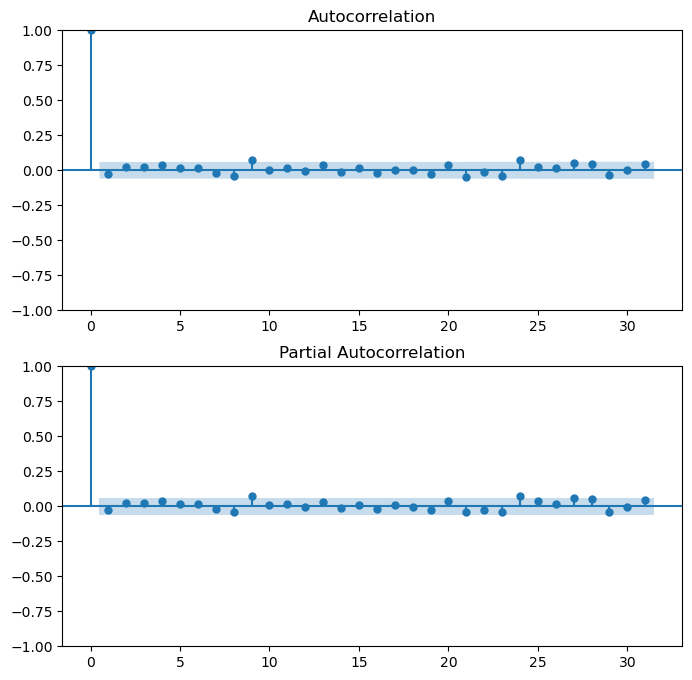

In [17]:
fig, ax = plt.subplots(2, 1, figsize = (8, 8))

plot_acf(differenced_crypto["BTCUSDT"], ax = ax[0])
plot_pacf(differenced_crypto["BTCUSDT"], ax = ax[1])

plt.show()

In [18]:
acf(differenced_crypto["BTCUSDT"])

array([ 1.00000000e+00, -2.71120383e-02,  2.18629789e-02,  2.23185036e-02,
        3.84371579e-02,  1.40491997e-02,  1.70790795e-02, -1.71388766e-02,
       -3.87582903e-02,  7.51719119e-02,  5.40453304e-04,  1.47582032e-02,
       -8.52005028e-03,  3.67787696e-02, -1.08697828e-02,  1.32169785e-02,
       -2.29207386e-02,  3.86060217e-03, -1.43772796e-03, -2.81676755e-02,
        3.96960436e-02, -4.74877471e-02, -1.52225458e-02, -4.23114197e-02,
        7.47146381e-02,  2.06442072e-02,  1.42398114e-02,  5.25500476e-02,
        4.53486902e-02, -3.03709793e-02,  4.24098696e-03])

In [19]:
pacf(differenced_crypto["BTCUSDT"])

array([ 1.        , -0.02713684,  0.02118221,  0.0235644 ,  0.03941419,
        0.01530512,  0.01583761, -0.01882928, -0.04315877,  0.07266349,
        0.00579377,  0.01490415, -0.00805703,  0.03222268, -0.01112926,
        0.00666196, -0.02281954,  0.00610652, -0.00534651, -0.02940944,
        0.03977649, -0.04225824, -0.02322524, -0.04142793,  0.07270804,
        0.03553259,  0.01327465,  0.05734365,  0.04927679, -0.04394498,
       -0.00439223])

There are no significant lags outside of the significance bounds in both the ACF and PACF plots, time series data may not exhibit strong autucorrelation and partial autocorrelation. 

In such cases, an appropriate choice for the AR component of the ARIMA model could be 0 and appropriate choice for the MA component of the ARIMA model could be 0.

### ARIMA

In [20]:
# Based on the plots, select ARIMA(p, d, q) parameters

p = 0 # AR order.
d = 1 # Differencing order.
q = 0 # MA order.

# Fit the ARIMA model

differenced_crypto = differenced_crypto.asfreq("D")

model = ARIMA(log_transform["BTCUSDT"], order = (p, d, q))
model_fit = model.fit()

# Display model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                BTCUSDT   No. Observations:                 1095
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2113.584
Date:                Thu, 06 Jul 2023   AIC                          -4225.169
Time:                        19:48:00   BIC                          -4220.171
Sample:                    07-03-2020   HQIC                         -4223.278
                         - 07-02-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0012   3.31e-05     37.150      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):               437.50
Prob(Q):                              0.37   Pr

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Auto Arima Forecasting

* In Python, the pmdarima package provides auto_arima() function which can be used to automate the process of ARIMA Forecasting in Python.

* auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

In [21]:
import pmdarima as pm

auto_model = pm.auto_arima(log_transform["BTCUSDT"], stepwise = True, trace = True, test = "adf")

auto_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4219.310, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4224.263, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4223.067, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4223.032, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4225.169, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4221.330, Time=0.67 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.324 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1095
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2113.584
Date:                Thu, 06 Jul 2023   AIC                          -4225.169
Time:                        19:48:03   BIC                          -4220.171
Sample:                    07-03-2020   HQIC                         -4223.278
                         - 07-02-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0012   3.31e-05     37.150      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):               437.50
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### result:

The auto_arima function result and own created arima has same order (0, 1, 0). I am going to continue with auto_arima result.

### Diagnostics

Diagnostics help evaluate the residuals, which are the differences between the observed values and the model's predicted values. Analyzing the residuals helps detect any remaining patterns, such as autocorrelation or heteroscedasticity, which can indicate model misspecification or the need for additional variables.

Time series models often rely on specific assumptions, such as stationarity, normality of residuals, and absence of autocorrelation. Diagnostics allow you to check these assumptions and determine if they are met. Violations of assumptions may require model modifications or alternative approaches.

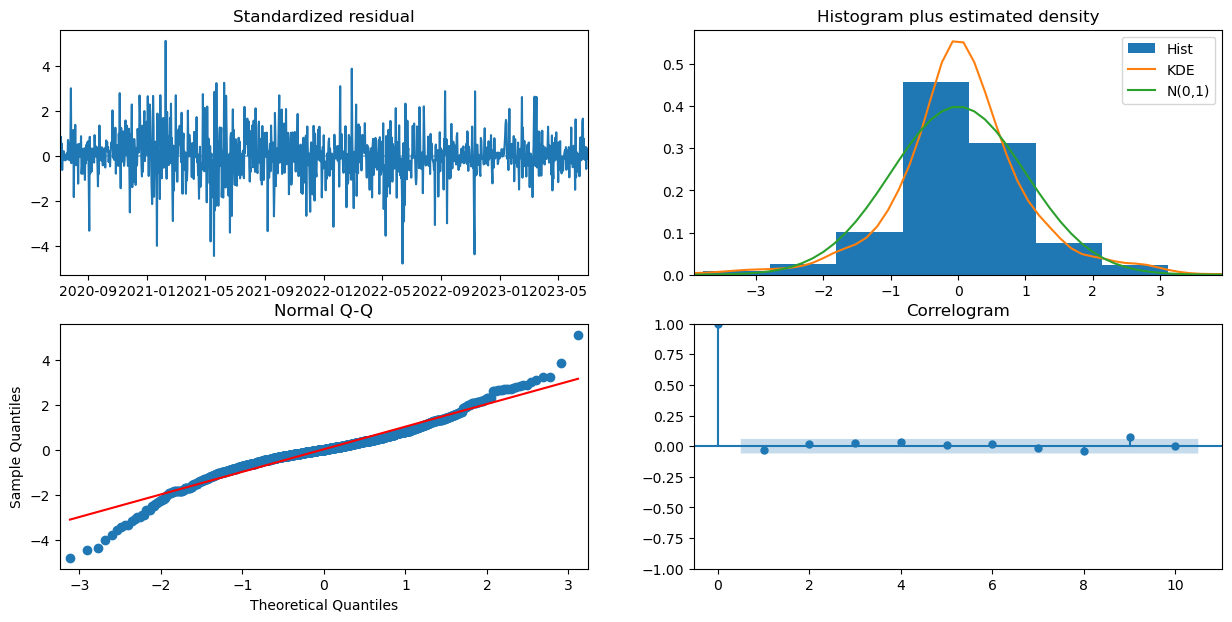

In [22]:
auto_model.plot_diagnostics(figsize = (15, 7))

plt.show()

#### interpretations

* Based on standardized graph, there are no patterns and trends.
* Autocorrelation graph : There is no any correlation between consecutive residuals.
* QQ plot : Mostly the dots fall perfectly in line with red line. Any significant deviations would imply the distribution is skewed.

### Forecasting

In [23]:
forecast, confint = auto_model.predict(n_periods = 365, return_conf_int=True) # next 1 years prediction.

In [24]:
forecast_original = np.exp(forecast) # compute the inverse of the log transform.

In [25]:
# Create a pandas DateTimeIndex for the forecasted dates
forecast_dates = pd.date_range(start = crypto.index[-1] + pd.DateOffset(1), periods = 365)

In [26]:
# makes series for plotting purpose

forecast_series = pd.Series(forecast_original, forecast_dates)

lower_series = pd.Series(np.exp(confint[:, 0]), forecast_dates)
upper_series = pd.Series(np.exp(confint[:, 1]), forecast_dates)

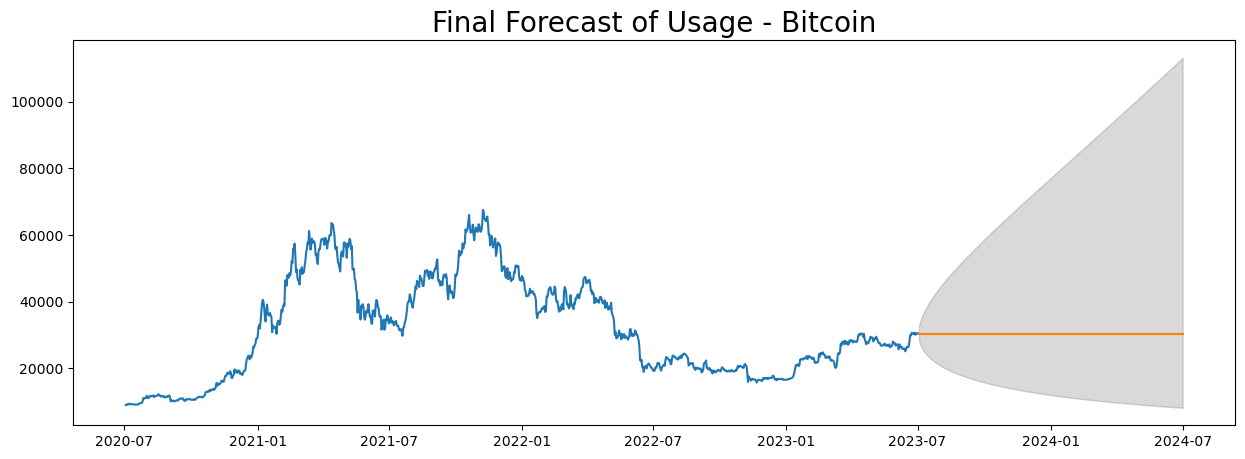

In [29]:
# plot

plt.figure(figsize = (15, 5))

plt.plot(crypto["BTCUSDT"])
plt.plot(forecast_series)
plt.fill_between(lower_series.index, lower_series, upper_series, color = "k", alpha = 0.15)

plt.title("Final Forecast of Usage - Bitcoin", fontdict={"fontsize": 20})

plt.show()